In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train-agg/train_agg.csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from numpy.fft import *
from sklearn.model_selection import cross_val_score,train_test_split
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.style as style
import eli5
from skopt import BayesSearchCV
from eli5.sklearn import PermutationImportance
style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since 

In [ ]:
train_agg = pd.read_csv('/kaggle/input/train-agg/train_agg.csv')

In [ ]:
train_agg

,BookingID,label,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,...,acc_gyro_xz_min,acc_gyro_yz,acc_gyro_yz_max,acc_gyro_yz_min,acc_gyro_xyz,acc_gyro_xyz_max,acc_gyro_xyz_min,roll,pitch,tilt_angle
0,0,0.0,9.684211,193.239085,-0.640125,-9.575568,-1.577701,0.001759,0.000878,-0.003410,...,0.005497,0.009984,0.009984,0.009984,0.010048,0.010048,0.010048,-49.358225,-3.361713,99.335704
1,1,1.0,3.759000,130.116883,-0.503371,9.429374,-2.142700,-0.003702,-0.012050,-0.002345,...,0.005359,0.113739,0.113739,0.113739,0.113755,0.113755,0.113755,38.139504,-2.763188,102.784702
2,2,1.0,3.980125,254.250000,0.589590,9.724946,-0.123604,-0.024034,-0.014618,-0.011293,...,0.014239,0.142166,0.142166,0.142166,0.142871,0.142871,0.142871,139.654677,3.138395,90.726858
3,4,1.0,10.000000,152.150878,-0.331118,-9.458353,-2.691127,-0.026253,0.034866,0.002281,...,0.010642,0.329830,0.329830,0.329830,0.329945,0.329945,0.329945,-30.967057,-1.863039,105.873084
4,6,0.0,4.331516,207.734375,0.572232,9.521732,2.328694,-0.000318,-0.023650,0.006644,...,0.015472,0.225719,0.225719,0.225719,0.225719,0.225719,0.225719,35.031535,3.038000,76.280961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1666450000000,0.0,12.874602,171.440015,0.113622,3.835069,0.876877,-0.000486,-0.001796,-0.001107,...,0.000972,0.006955,0.006955,0.006955,0.006955,0.006955,0.006955,85.257616,1.647743,77.126341
1486,1675040000000,0.0,7.535183,161.270717,0.123551,4.714049,0.969348,0.000354,-0.000033,-0.000679,...,0.000660,0.000676,0.000676,0.000676,0.000678,0.000678,0.000678,79.844573,1.463475,78.384146
1487,1683630000000,0.0,8.671881,171.974972,0.132335,5.514494,1.136692,-0.006675,0.000552,0.004761,...,0.005484,0.006209,0.006209,0.006209,0.006271,0.006271,0.006271,69.664262,1.338874,78.356120
1488,1700810000000,0.0,6.657886,172.287657,0.000467,5.962826,1.243431,-0.001083,-0.000385,-0.001628,...,0.002024,0.003062,0.003062,0.003062,0.003062,0.003062,0.003062,64.723932,0.004392,78.220884


In [ ]:
train_ag = train_agg.loc[(train_agg['second'] <= 2000)]

In [ ]:
train_agg = train_ag

(0.0, 900.0)

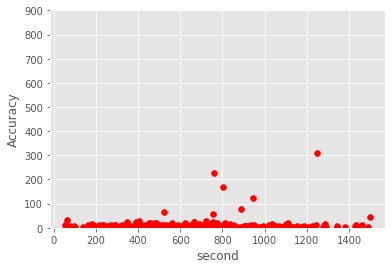

In [ ]:
data = train_agg[train_agg['label'] == 1].sort_values(by=['second'])
plt.scatter(data['second'],data['Accuracy'], color='red')
plt.xlabel('second')
plt.ylabel('Accuracy')
plt.ylim(0,900)

In [ ]:
train_agg['Accuracy'].max()

834.2272727272727

In [ ]:
train_agg

,BookingID,label,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,...,acc_gyro_xz_min,acc_gyro_yz,acc_gyro_yz_max,acc_gyro_yz_min,acc_gyro_xyz,acc_gyro_xyz_max,acc_gyro_xyz_min,roll,pitch,tilt_angle
0,0,0.0,9.684211,193.239085,-0.640125,-9.575568,-1.577701,0.001759,0.000878,-0.003410,...,0.005497,0.009984,0.009984,0.009984,0.010048,0.010048,0.010048,-49.358225,-3.361713,99.335704
1,1,1.0,3.759000,130.116883,-0.503371,9.429374,-2.142700,-0.003702,-0.012050,-0.002345,...,0.005359,0.113739,0.113739,0.113739,0.113755,0.113755,0.113755,38.139504,-2.763188,102.784702
2,2,1.0,3.980125,254.250000,0.589590,9.724946,-0.123604,-0.024034,-0.014618,-0.011293,...,0.014239,0.142166,0.142166,0.142166,0.142871,0.142871,0.142871,139.654677,3.138395,90.726858
3,4,1.0,10.000000,152.150878,-0.331118,-9.458353,-2.691127,-0.026253,0.034866,0.002281,...,0.010642,0.329830,0.329830,0.329830,0.329945,0.329945,0.329945,-30.967057,-1.863039,105.873084
4,6,0.0,4.331516,207.734375,0.572232,9.521732,2.328694,-0.000318,-0.023650,0.006644,...,0.015472,0.225719,0.225719,0.225719,0.225719,0.225719,0.225719,35.031535,3.038000,76.280961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1666450000000,0.0,12.874602,171.440015,0.113622,3.835069,0.876877,-0.000486,-0.001796,-0.001107,...,0.000972,0.006955,0.006955,0.006955,0.006955,0.006955,0.006955,85.257616,1.647743,77.126341
1486,1675040000000,0.0,7.535183,161.270717,0.123551,4.714049,0.969348,0.000354,-0.000033,-0.000679,...,0.000660,0.000676,0.000676,0.000676,0.000678,0.000678,0.000678,79.844573,1.463475,78.384146
1487,1683630000000,0.0,8.671881,171.974972,0.132335,5.514494,1.136692,-0.006675,0.000552,0.004761,...,0.005484,0.006209,0.006209,0.006209,0.006271,0.006271,0.006271,69.664262,1.338874,78.356120
1488,1700810000000,0.0,6.657886,172.287657,0.000467,5.962826,1.243431,-0.001083,-0.000385,-0.001628,...,0.002024,0.003062,0.003062,0.003062,0.003062,0.003062,0.003062,64.723932,0.004392,78.220884


**VISUALISASI DATA**

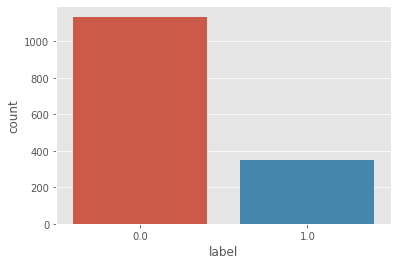

In [ ]:
sns.countplot(train_agg['label'])

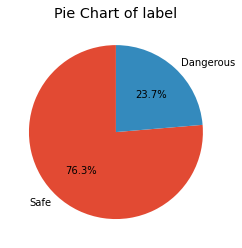

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
val = train_agg['label'].value_counts()
label = ['Safe', 'Dangerous']

plt.pie(val, labels = label, startangle = 90, autopct = '%.1f%%')
plt.title('Pie Chart of label')
plt.show()

Karena distrbusi safe dan dangerous drivernya imbalanced, maka saat ingin melakukan pemodelan terlebih dahulu dilakukan resampling, cross validation

In [ ]:
train_agg['Accuracy'].max()

834.2272727272727

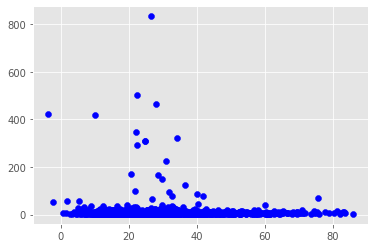

In [ ]:
plt.scatter(train_agg['Speed'], train_agg['Accuracy'], color='blue')

Umuumnya driver berkendara dengan kecepatan sekitar 20-40 km/jam cenderung memiliki akurasi mengantar customer sampai tujuan lebih baik

Text(0.5, 1.0, 'Distribution of second')

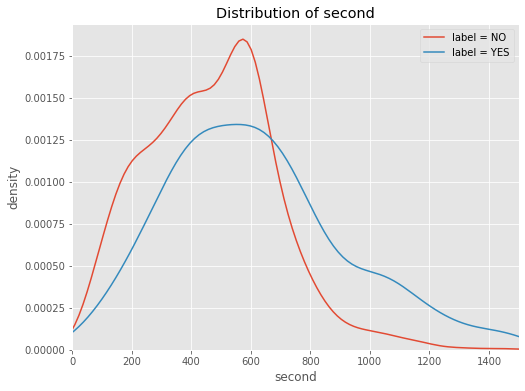

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))

sns.kdeplot(train_agg.loc[train_agg['label'] == 0, 'second'], label = 'label = NO')
sns.kdeplot(train_agg.loc[train_agg['label'] == 1, 'second'], label = 'label = YES')

plt.xlim(0,1500)

plt.xlabel('second')
plt.ylabel('density')
plt.title('Distribution of second')

Semakin lama waktu tempuh yang diperlukan driver ojek online untuk mengantarkan customer, cenderung driver tersebut tidak safe

Text(0.5, 1.0, 'Distribution of speed')

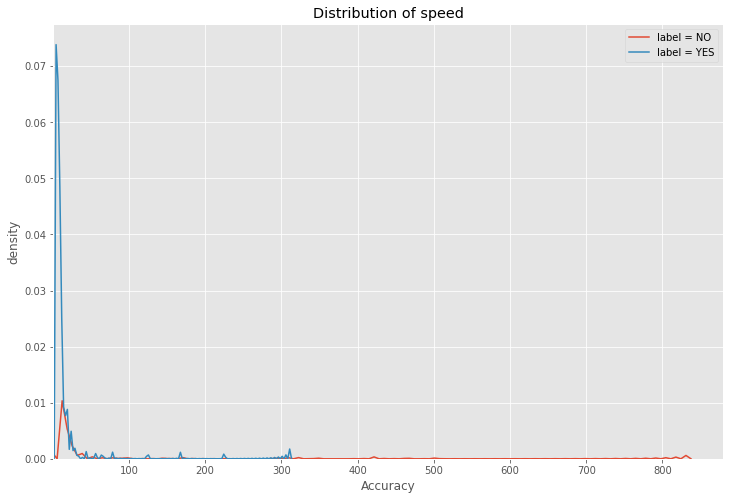

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

sns.kdeplot(train_agg.loc[train_agg['label'] == 0, 'Accuracy'], label = 'label = NO')
sns.kdeplot(train_agg.loc[train_agg['label'] == 1, 'Accuracy'], label = 'label = YES')

plt.xlim(0.900)
plt.xlabel('Accuracy')
plt.ylabel('density')
plt.title('Distribution of speed')

Text(0.5, 1.0, 'Distribution of second')

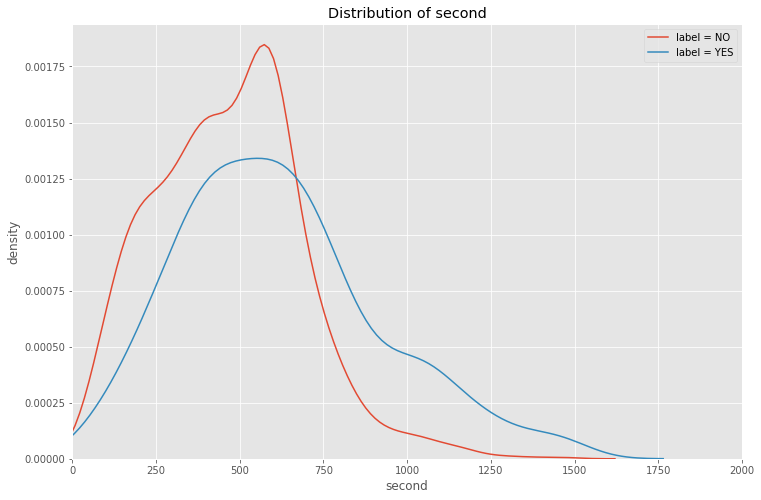

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))

sns.kdeplot(train_agg.loc[train_agg['label'] == 0, 'second'], label = 'label = NO')
sns.kdeplot(train_agg.loc[train_agg['label'] == 1, 'second'], label = 'label = YES')

plt.xlim(0,2000)

plt.xlabel('second')
plt.ylabel('density')
plt.title('Distribution of second')

In [ ]:
train_agg['BookingID'].unique()

array([            0,             1,             2, ..., 1683630000000,
       1700810000000, 1709400000000])

In [ ]:
train_agg.tail(20)

,BookingID,label,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,...,acc_gyro_xz_min,acc_gyro_yz,acc_gyro_yz_max,acc_gyro_yz_min,acc_gyro_xyz,acc_gyro_xyz_max,acc_gyro_xyz_min,roll,pitch,tilt_angle
1470,1529010000000,0.0,21.466255,171.109108,-0.131867,4.339543,0.628953,-0.004990,0.000090,-0.002090,...,0.001470,0.001372,0.001372,0.001372,0.001521,0.001521,0.001521,119.856899,-1.713175,81.757001
1471,1537600000000,0.0,9.392371,165.443470,0.051493,4.452932,0.916478,0.004561,-0.001071,-0.002325,...,0.002143,0.005223,0.005223,0.005223,0.005228,0.005228,0.005228,84.258711,0.648380,78.370858
1472,1546190000000,1.0,6.738443,164.035210,-0.145558,4.402913,0.585405,0.003488,0.000338,0.003642,...,0.002191,0.002601,0.002601,0.002601,0.002650,0.002650,0.002650,127.984384,-1.864548,82.430549
1473,1554780000000,0.0,8.544617,178.648986,0.286848,5.661844,1.289213,-0.002443,0.004525,-0.002527,...,0.003332,0.025829,0.025829,0.025829,0.025838,0.025838,0.025838,60.559794,2.756344,77.188243
1474,1563370000000,0.0,9.631029,168.261115,-0.133643,3.880103,0.834213,0.000102,0.002725,0.000268,...,0.000224,0.010576,0.010576,0.010576,0.010576,0.010576,0.010576,89.421694,-1.918001,77.873227
1475,1571960000000,0.0,11.743817,171.497673,-0.036818,3.806107,0.545938,-0.001081,-0.000105,0.002596,...,0.001418,0.001473,0.001473,0.001473,0.001474,0.001474,0.001474,137.576962,-0.548385,81.837702
1476,1589140000000,0.0,14.977684,175.325713,0.211893,4.463960,1.383618,0.001551,0.000566,0.000220,...,0.000448,0.002544,0.002544,0.002544,0.002565,0.002565,0.002565,55.276542,2.559904,72.797248
1477,1597730000000,0.0,7.810324,162.496906,0.408266,4.256860,0.646196,-0.001256,-0.000588,-0.000445,...,0.000588,0.002521,0.002521,0.002521,0.002573,0.002573,0.002573,100.449838,5.158021,81.407178
1478,1606320000000,0.0,6.740585,165.584591,-0.056010,4.819113,1.449346,-0.005686,0.037874,-0.010940,...,0.015860,0.183207,0.183207,0.183207,0.183207,0.183207,0.183207,53.968263,-0.637035,73.262428
1479,1614910000000,1.0,6.216123,160.278096,0.142952,5.754703,1.314217,-0.009961,0.006537,-0.000326,...,0.001487,0.037621,0.037621,0.037621,0.037648,0.037648,0.037648,60.623272,1.378216,77.139652


In [ ]:
bb = train_agg.loc[(train_agg['second'] >= 1300)]

In [ ]:
bb.head(30)

,BookingID,label,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,...,acc_gyro_xz_min,acc_gyro_yz,acc_gyro_yz_max,acc_gyro_yz_min,acc_gyro_xyz,acc_gyro_xyz_max,acc_gyro_xyz_min,roll,pitch,tilt_angle
238,17179869274,1.0,3.877019,220.885350,0.282617,9.650092,2.606025,-0.014465,0.004244,-0.000271,...,0.004149,0.040964,0.040964,0.040964,0.041167,0.041167,0.041167,32.077074,1.578783,74.893837
239,17179869282,1.0,44.072165,121.402017,0.011639,-5.825627,-5.904237,-0.048695,0.017403,0.049016,...,0.289400,0.306644,0.306644,0.306644,0.306645,0.306645,0.306645,-13.593568,0.080396,135.383915
258,17179869359,1.0,4.375656,113.416667,-0.103537,9.933069,0.981436,-0.010707,-0.005953,0.003915,...,0.003999,0.059255,0.059255,0.059255,0.059266,0.059266,0.059266,85.371095,-0.592215,84.357517
518,42949672984,0.0,4.750887,238.796992,0.482838,8.848751,4.092932,-0.000475,-0.005939,-0.005836,...,0.023887,0.057728,0.057728,0.057728,0.057729,0.057729,0.057729,20.273231,2.643525,65.209842
660,51539607588,0.0,5.237915,252.068376,0.480565,9.809825,1.395592,0.003156,-0.002367,-0.002935,...,0.004367,0.023581,0.023581,0.023581,0.023630,0.023630,0.023630,57.031578,2.590408,81.912735
722,51539607673,1.0,3.229283,235.283019,-0.129962,8.042132,5.171604,-0.282329,-0.087460,0.115591,...,0.598918,0.923082,0.923082,0.923082,0.923811,0.923811,0.923811,16.027091,-0.774442,57.259801
745,51539607702,1.0,12.895120,121.450000,-1.799142,3.424783,5.646892,-0.012541,0.039371,-0.002468,...,0.026519,0.135556,0.135556,0.135556,0.137421,0.137421,0.137421,12.439351,-9.226408,34.414431
953,68719476856,1.0,11.627451,129.662188,1.489006,-3.905128,-8.626198,0.018165,0.018433,0.008125,...,0.075123,0.100467,0.100467,0.100467,0.104045,0.104045,0.104045,-8.640476,5.926214,154.149915
1027,77309411401,1.0,8.640351,241.085260,0.323649,-9.730657,-1.079305,0.002894,0.009965,-0.006105,...,0.006656,0.097194,0.097194,0.097194,0.097199,0.097199,0.097199,-74.665839,1.831818,96.325790
1072,77309411460,1.0,4.473442,99.230303,0.188234,9.727968,0.509211,-0.009931,-0.007616,0.005074,...,0.003189,0.074131,0.074131,0.074131,0.074154,0.074154,0.074154,154.968802,1.094337,87.004141


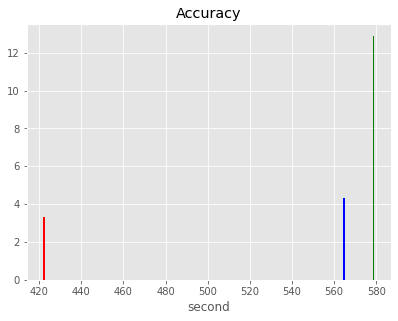

In [ ]:
cols = ['Accuracy']
plt.figure(figsize=(30, 16))
#plt.suptitle("Train / Test Line plot", fontsize=20)
for i, col in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    data = train_agg[train_agg['BookingID'] == 1666450000000].sort_values(by=['second'])
    plt.bar(data['second'],data[col], color='green')
    plt.title(col)
    #, train_agg['BookingID'] == 1632090000000, train_agg['BookingID'] == 4
    dataa = train_agg[train_agg['BookingID'] == 148].sort_values(by=['second'])
    plt.bar(dataa['second'],dataa[col], color='red')
    plt.title(col)
    dataaa = train_agg[train_agg['BookingID'] == 6].sort_values(by=['second'])
    plt.bar(dataaa['second'],dataaa[col], color='blue')
    plt.title(col)

    plt.xlabel('second')

Text(0.5, 0, 'second')

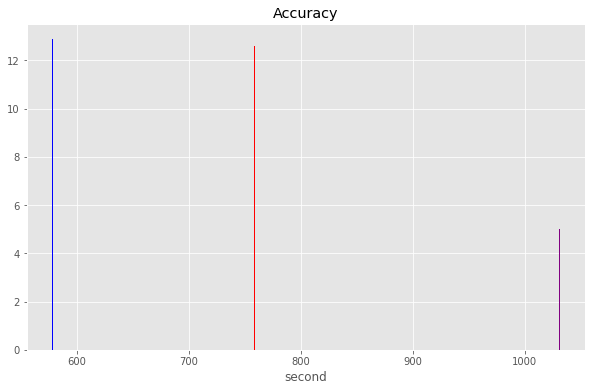

In [ ]:
#cols = ['Accuracy']
plt.figure(figsize=(10, 6))
#plt.suptitle("Train / Test Bar plot", fontsize=20)
#for i, col in enumerate(cols):
    #plt.subplot(2, 4, i + 1)
data = train_agg[train_agg['BookingID'] == 1709400000000].sort_values(by=['second'])
plt.bar(data['second'],data['Accuracy'], color='red')
    #, train_agg['BookingID'] == 1632090000000, train_agg['BookingID'] == 4
dataa = train_agg[train_agg['BookingID'] == 1666450000000].sort_values(by=['second'])
plt.bar(dataa['second'],dataa['Accuracy'], color='blue')
ddaaaa = train_agg[train_agg['BookingID'] == 42949672973].sort_values(by=['second'])
plt.bar(ddaaaa['second'],ddaaaa['Accuracy'], color='purple')
plt.title('Accuracy')
plt.xlabel('second')

Dengan melihat dari 3 sampel dengan waktu lebih dari 600 detik, terlihat bahwa semakin lama driver mengantar customer maka accuracynya semakin menurun

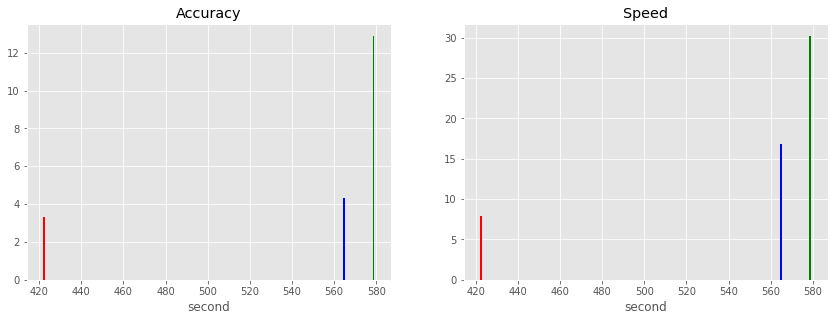

In [ ]:
cols = ['Accuracy','Speed']
plt.figure(figsize=(30, 16))
#plt.suptitle("Train / Test Line plot", fontsize=20)
for i, col in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    data = train_agg[train_agg['BookingID'] == 1666450000000].sort_values(by=['second'])
    plt.bar(data['second'],data[col], color='green')
    plt.title(col)
    #, train_agg['BookingID'] == 1632090000000, train_agg['BookingID'] == 4
    dataa = train_agg[train_agg['BookingID'] == 148].sort_values(by=['second'])
    plt.bar(dataa['second'],dataa[col], color='red')
    plt.title(col)
    dataaa = train_agg[train_agg['BookingID'] == 6].sort_values(by=['second'])
    plt.bar(dataaa['second'],dataaa[col], color='blue')
    plt.title(col)
    plt.xlabel('second')

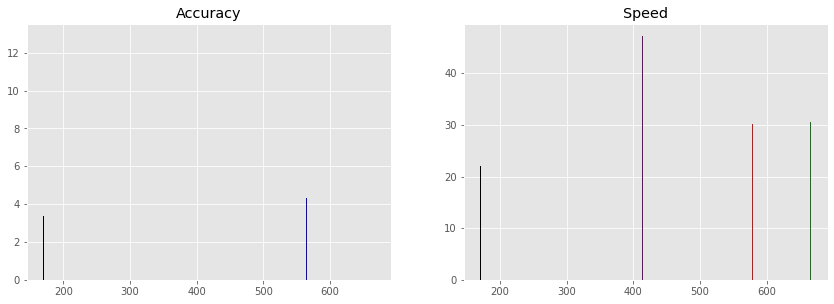

In [ ]:
cols = ['Accuracy','Speed']
plt.figure(figsize=(30, 16))
#plt.suptitle("Train / Test Line plot", fontsize=20)
for i, col in enumerate(cols):
    plt.subplot(3, 4, i + 1)
    data = train_agg[train_agg['BookingID'] == 1623500000000].sort_values(by=['second'])
    plt.bar(data['second'],data[col], color='green')
    plt.title(col)
    #, train_agg['BookingID'] == 1632090000000, train_agg['BookingID'] == 4
    dataa = train_agg[train_agg['BookingID'] == 1666450000000].sort_values(by=['second'])
    plt.bar(dataa['second'],dataa[col], color='red')
    plt.title(col)
    dataaa = train_agg[train_agg['BookingID'] == 6].sort_values(by=['second'])
    plt.bar(dataaa['second'],dataaa[col], color='blue')
    plt.title(col)
    dataae = train_agg[train_agg['BookingID'] == 151].sort_values(by=['second'])
    plt.bar(dataae['second'],dataae[col], color='purple')
    plt.title(col)
    dataaae = train_agg[train_agg['BookingID'] == 34359738544].sort_values(by=['second'])
    plt.bar(dataaae['second'],dataaae[col], color='black')
    plt.title(col)



In [ ]:
train_agg.groupby(['BookingID', 'Accuracy'])['Accuracy'].min()

BookingID      Accuracy 
0              9.684211      9.684211
1              3.759000      3.759000
2              3.980125      3.980125
4              10.000000    10.000000
6              4.331516      4.331516
                              ...    
1666450000000  12.874602    12.874602
1675040000000  7.535183      7.535183
1683630000000  8.671881      8.671881
1700810000000  6.657886      6.657886
1709400000000  12.603726    12.603726
Name: Accuracy, Length: 1487, dtype: float64

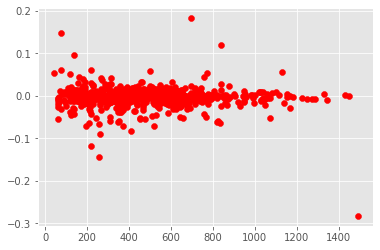

In [ ]:
data = train_agg[train_agg['label'] == 1 & train_agg['BookingID']]
plt.scatter(data['second'],data['gyro_x'], color='red')

MODELLING

In [ ]:
X = train_agg.drop(['BookingID','label'],axis=1)
y = train_agg['label']
scaler = StandardScaler()
#Scaling features
X = scaler.fit_transform(X)
skf = StratifiedKFold(n_splits=10)
model = LogisticRegression()
res_lr = cross_val_score(model,X,y,cv=skf,scoring='roc_auc')
print(f"StratifiedCV LogisticRegression Scores : {res_lr}")
print(f"mean StratifiedCV LogisticRegression Scores : {res_lr.mean()}")

StratifiedCV LogisticRegression Scores : [0.71102757 0.63433584 0.77318296 0.58822055 0.65538847 0.61578171
 0.64110128 0.69127686 0.73527181 0.9357775 ]
mean StratifiedCV LogisticRegression Scores : 0.6981364547060867


In [ ]:
X = train_agg.drop(['BookingID','label'],axis=1)
y = train_agg['label']
skf = StratifiedKFold(n_splits=50, random_state=0)
model = RandomForestClassifier()
res_rf = cross_val_score(model,X,y,cv=skf,scoring='roc_auc')
print(f"StratifiedCV RandomForest Scores : {res_rf}")
print(f"mean StratifiedCV RandomForest Scores : {res_rf.mean()}")

StratifiedCV RandomForest Scores : [0.68322981 0.63354037 0.42857143 0.68944099 0.67080745 0.44409938
 0.5        0.68322981 0.68012422 0.60559006 0.59006211 0.72049689
 0.60869565 0.82298137 0.65217391 0.78881988 0.49689441 0.6863354
 0.57453416 0.53726708 0.62111801 0.70496894 0.6552795  0.66149068
 0.63043478 0.54658385 0.59937888 0.68322981 0.68012422 0.43167702
 0.48136646 0.61490683 0.81055901 0.7484472  0.50310559 0.61647727
 0.71590909 0.6038961  0.7012987  0.71103896 0.38311688 0.83441558
 0.76298701 0.93506494 0.92857143 1.         0.87012987 1.
 0.98701299 0.97727273]
mean StratifiedCV RandomForest Scores : 0.6779351355166573


In [ ]:
X = train_agg.drop(['BookingID', 'label'],axis=1)
y = train_agg['label']
skf = StratifiedKFold(n_splits=10, random_state=7)
model = xgb.XGBClassifier()
res_xgb = cross_val_score(model,X,y,cv=skf,scoring='roc_auc')
print(f"StratifiedCV XGBoost Scores : {res_xgb}")
print(f"mean StratifiedCV XGBoost Scores : {res_xgb.mean()}")

StratifiedCV XGBoost Scores : [0.66566416 0.62005013 0.7122807  0.55162907 0.67092732 0.5607178
 0.55555556 0.59342604 0.77067004 0.83084703]
mean StratifiedCV XGBoost Scores : 0.653176784143249


In [ ]:
X = train_agg.drop(['label'],axis=1)
y = train_agg['label']

scaler = StandardScaler()
#Scaling features
X = scaler.fit_transform(X)
skf = StratifiedKFold(n_splits=10, random_state=7)
model = lgb.LGBMClassifier()
res_lgb = cross_val_score(model,X,y,cv=skf,scoring='roc_auc')
print(f"StratifiedCV LGBM Scores : {res_lgb}")
print(f"mean StratifiedCV LGBM Scores : {res_lgb.mean()}")

StratifiedCV LGBM Scores : [0.63157895 0.30350877 0.43709273 0.03383459 0.04761905 0.0339233
 0.00270403 0.15929204 0.6687737  0.63843236]
mean StratifiedCV LGBM Scores : 0.29567595241791794


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
X = train_agg.drop(['BookingID', 'label'],axis=1)
y = train_agg['label']
skf = StratifiedKFold(n_splits=50, random_state=0)
model = RandomForestClassifier()
multi = MultiOutputClassifier(model)
res_rf = cross_val_score(model,X.values,y,cv=skf,scoring='roc_auc')
print(f"StratifiedCV RandomForest Scores : {res_rf}")
print(f"mean StratifiedCV RandomForest Scores : {res_rf.mean()}")

StratifiedCV RandomForest Scores : [0.6863354  0.65217391 0.47826087 0.69565217 0.68944099 0.52173913
 0.48447205 0.65838509 0.68012422 0.72981366 0.60248447 0.78881988
 0.65838509 0.84782609 0.56832298 0.80745342 0.48757764 0.73291925
 0.62111801 0.59937888 0.57763975 0.73291925 0.66149068 0.68944099
 0.56832298 0.54347826 0.64906832 0.71428571 0.76708075 0.43478261
 0.49378882 0.52795031 0.78571429 0.7173913  0.50310559 0.71590909
 0.70170455 0.61688312 0.68181818 0.69480519 0.2987013  0.75324675
 0.81818182 0.96103896 0.95454545 1.         0.89935065 0.99350649
 0.99350649 0.99675325]
mean StratifiedCV RandomForest Scores : 0.6887418831168831


In [ ]:
oo = train_agg['BookingID']

In [ ]:
train_agg = train_agg.drop('BookingID', axis = 1)

In [ ]:
from imblearn.over_sampling import SMOTE

#Separate input features and target
y = train_agg['label']
X = train_agg.drop('label', axis=1)
sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

Train: [ 156  157  158 ... 2267 2268 2269] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 161 162 168 172 176 180
 183 190 192 196 200 204 210 211 214 215 216 219 222 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 279 281 282 290 296
 298 313 315 324 325 330 332 333 338 340 350]

0.8073394495412844
Rep

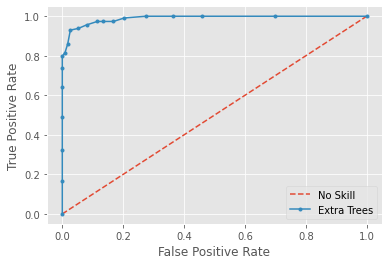

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
accuracy = []
skf = StratifiedKFold(n_splits= 10)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X,y):
    print ("Train:", train_index, 'Validation:', test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = ExtraTreesClassifier(n_estimators=20)

    X_train_res = pd.DataFrame(X_train)
    X_train_res.columns = X_train.columns
    model.fit(X_train_res, y_train)

    y_pred = model.predict(X_test)
    print()
    print(f1_score(y_test, y_pred))
    print('Report : ')
    score = accuracy_score(y_test, y_pred)
    accuracy.append(score)
    print()
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Extra Trees: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Extra Trees')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
accuracy = np.array(accuracy)
accuracy.mean()

0.8704845814977974

Text(0, 0.5, 'Accuracy')

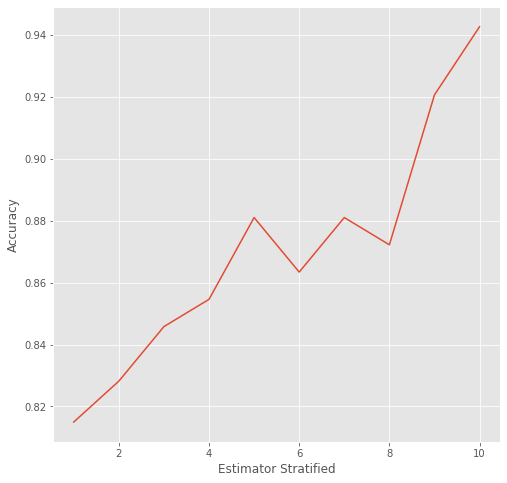

In [ ]:
Accu = pd.DataFrame()
cc =[1,2,3,4,5,6,7,8,9,10]
Accu['Estimator'] = cc
Accu['Akurasi'] = np.array(accuracy)
plt.figure(figsize=(8,8))
plt.plot('Estimator', 'Akurasi', data=Accu)
plt.xlabel('Estimator Stratified')
plt.ylabel('Accuracy')

Semakin bsar data dibagi, akurasi dari modelling semakin baik

In [ ]:
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test, y_pred)

In [ ]:
#metrix
result

array([[107,   6],
       [  7, 107]])

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, recall_score
f1_score(y_test, y_pred)/10

0.09427312775330397

Diperoleh nilai f1_score rata2 setelah ada proses cross validation sebesar 93 persen, model cocok untuk diaplikasikan pada data ini